In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
#LOADING THE DATA

In [81]:
data = pd.read_csv(r"C:\Users\Vagdevi\Downloads\train.csv")

In [82]:
#EXPLORATORY DATA ANALYSIS

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
data_num = data[["Age", "SibSp", "Parch", "Fare"]]
data_cat = data[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]

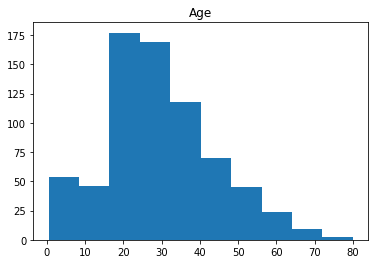

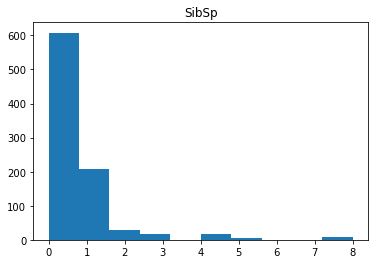

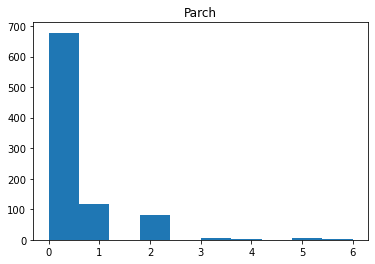

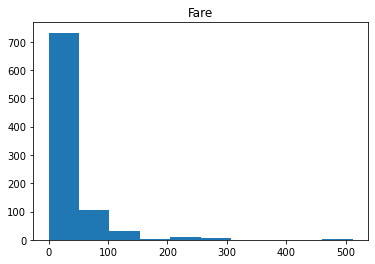

In [86]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

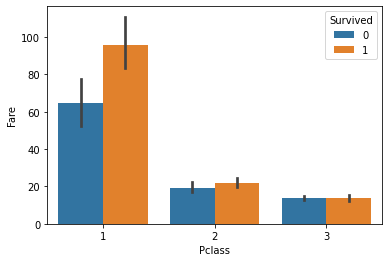

In [89]:
sns.barplot(data=data, x="Pclass", y="Fare", hue="Survived")
plt.show()

In [90]:
pd.pivot_table(data, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


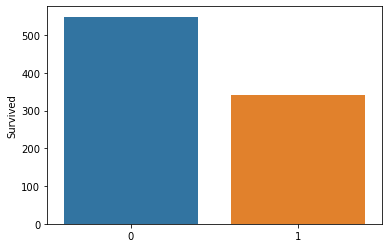

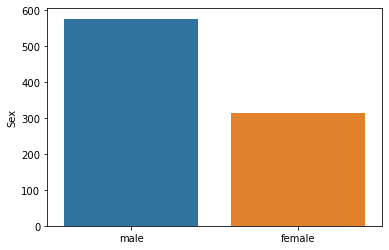

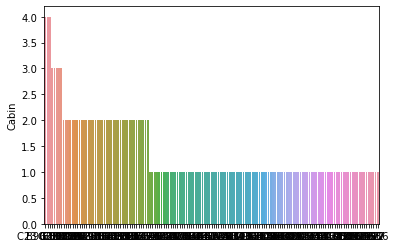

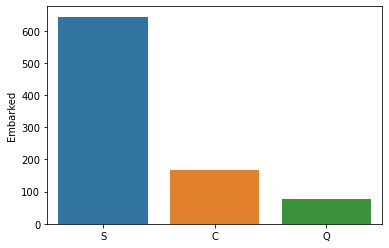

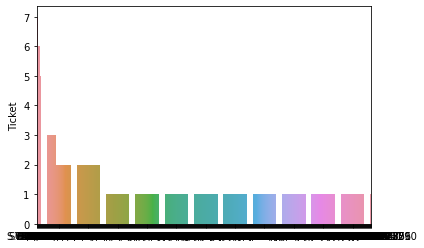

In [92]:
for i in data_cat.columns:
    sns.barplot(x=data_cat[i].value_counts().index, y=data_cat[i].value_counts())
    plt.show()

In [93]:
#DROPPING COLUMNS THAT ARE NOT NEEDED

In [94]:
data = data.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [95]:
#FILLING MISSING VALUES

In [96]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [97]:
#FEATURE ENGINEERING

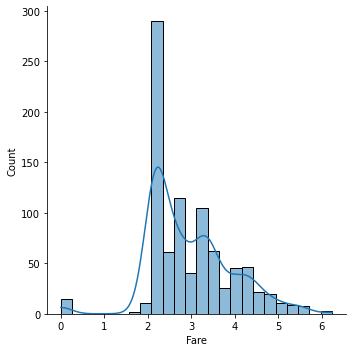

In [98]:
data["Fare"] = np.log(data["Fare"] + 1)
sns.displot(data["Fare"], kde=True)

In [101]:
#LABEL ENCODING FOR CATEGORICAL VARIABLES

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2


In [104]:
#DEFINING TARGET VARIABLES

In [106]:
X = data.drop(columns=["Survived"], axis=1)
y = data["Survived"]

In [107]:
from sklearn.model_selection import train_test_split, cross_val_score

In [108]:
#TRAINING AND EVALUATING THE MODEL

In [110]:
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
    model.fit(x_train, y_train)
    print("Accuracy", model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print("CV SCORE :", np.mean(score))

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy 0.8116591928251121
CV SCORE : 0.7833971502102819


In [115]:
# Model Evaluation

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)